# PROUNI

Base de dados do PROUNI com filtro de dados para a cidade de João Pessoa na Paraíba.

## Preparação do Ambiente

In [2]:
# Importações das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as ptl
from scipy import stats

In [3]:
'''
Leitura da base de dados.
A leitura foi utilizada a partir de um arquivo CSV disponibilizado no Github.
'''
df = pd.read_csv('https://raw.githubusercontent.com/mrafaelbatista/uniesp_dmie232/main/databases/cursos-prouni-pb-jpa.csv')

# Detecção de outliers com **Média** e **Mediana**

In [4]:
# Média e Mediana
media   = df['mensalidade'].mean()
mediana = df['mensalidade'].median()
desvpad = df['mensalidade'].std()

print(f'MENSALIDADE')
print(f'Média {media}')
print(f'Mediana {mediana}')
print(f'Desvio Padrão {desvpad}')

MENSALIDADE
Média 663.3612777777778
Mediana 492.39
Desvio Padrão 757.1894344917154


Sobre **mensalidade**

*   Necessário verificar / remover os outliers;
*   Se houverem valores vazios trabalhar com a mediana. *Analisar após o tratamento de outliers.*



In [5]:
# Média e Mediana
media   = df['nota_integral_ampla'].mean()
mediana = df['nota_integral_ampla'].median()
desvpad = df['nota_integral_ampla'].std()

print(f'MENSALIDADE')
print(f'Média {media}')
print(f'Mediana {mediana}')
print(f'Desvio Padrão {desvpad}')

MENSALIDADE
Média 593.8917567567568
Mediana 591.51
Desvio Padrão 39.80384881681868


Sobre **nota_integral_ampla**

* Se houverem valores vazios trabalhar com a média ou mediana.

In [6]:
# Média e Mediana
media   = df['nota_integral_cotas'].mean()
mediana = df['nota_integral_cotas'].median()
desvpad = df['nota_integral_cotas'].std()

print(f'MENSALIDADE')
print(f'Média {media}')
print(f'Mediana {mediana}')
print(f'Desvio Padrão {desvpad}')

MENSALIDADE
Média 583.7900952380952
Mediana 579.78
Desvio Padrão 38.526778569931494


Sobre **nota_integral_cotas**

*   Se houverem valores vazios trabalhar com a média ou mediana.

# Detecção de outliers com **ZSCORE**

In [7]:
'''Aplicação manual do Zscore na coluna de mensalidade'''

df['zscore_mensalidade'] = (
    df.mensalidade - df['mensalidade'].mean()) / df.mensalidade.std()

In [8]:
df['zscore_nota_integral_ampla'] = ((
     df.nota_integral_ampla - df.nota_integral_ampla.mean()) / df.nota_integral_ampla.std())

In [9]:
df['zscore_nota_integral_cotas'] = (
    df.mensalidade - df['nota_integral_cotas'].mean()) / df.mensalidade.std()

In [10]:
''' ZSCORE com a biblioteca scipy importando o stats '''

df['zscore_mensalidade'] = np.abs(stats.zscore(df.mensalidade))
df['zscore_nota_integral_ampla'] = np.abs(stats.zscore(df.mensalidade))
df['zscore_nota_integral_cotas'] = np.abs(stats.zscore(df.mensalidade))

In [11]:
''' Verificando os outliers a partir do ZSCORE'''
df.mensalidade[(df.zscore_mensalidade > 3) | (df.zscore_mensalidade < -3)]

281    7686.0
282    7412.7
283    8350.0
Name: mensalidade, dtype: float64

# Detecção de outliers com **gráfico BoxPlot**

<Axes: >

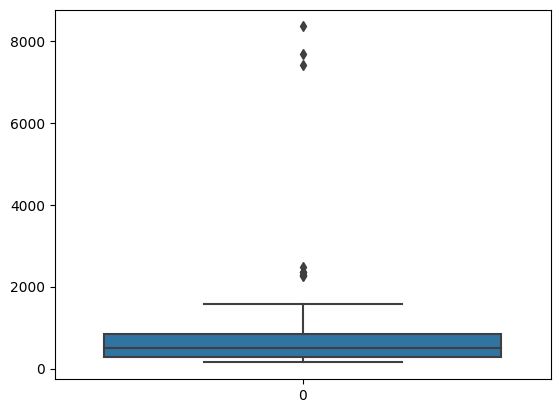

In [12]:
sns.boxplot(data=df.mensalidade)

<Axes: >

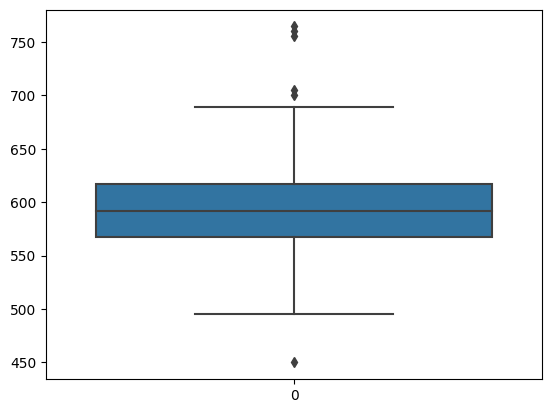

In [13]:
sns.boxplot(data=df.nota_integral_ampla)

<Axes: >

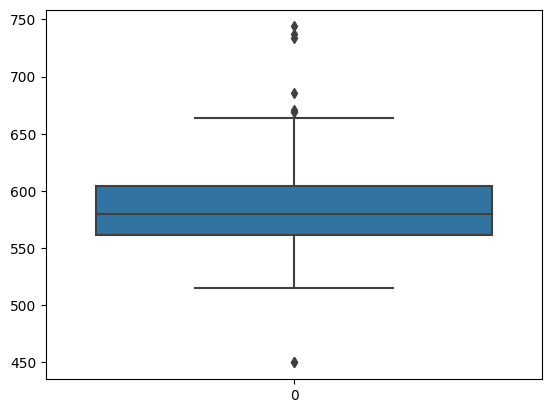

In [14]:
sns.boxplot(data=df.nota_integral_cotas)

# Removendo outliers

In [15]:
df_sout = df[(df.zscore_mensalidade < 3) & (df.zscore_mensalidade > -3)]

<Axes: >

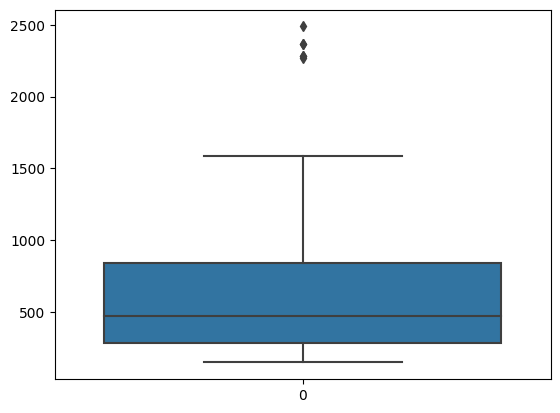

In [16]:
sns.boxplot(data=df_sout.mensalidade)

In [17]:
df.columns

Index(['uf_busca', 'cidade_busca', 'universidade_nome', 'campus_nome', 'nome',
       'grau', 'turno', 'mensalidade', 'bolsa_integral_cotas',
       'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla',
       'nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla',
       'nota_parcial_cotas', 'zscore_mensalidade',
       'zscore_nota_integral_ampla', 'zscore_nota_integral_cotas'],
      dtype='object')

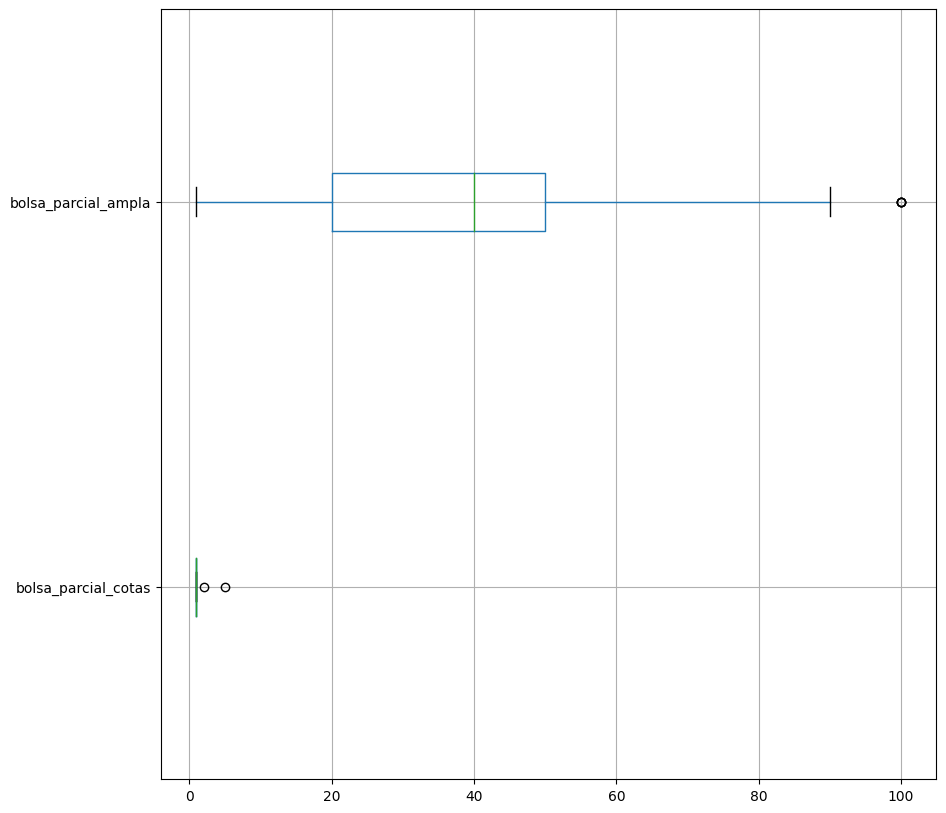

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
boxplot = df.boxplot(column=['bolsa_parcial_cotas',
'bolsa_parcial_ampla'],
ax=ax, vert=False)

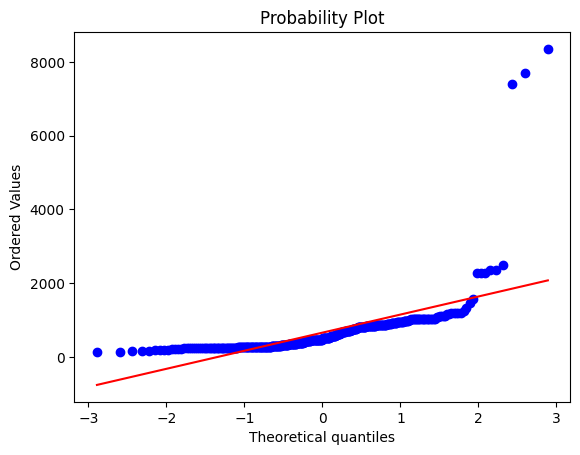

In [21]:
import pylab
import scipy.stats as stats
stats.probplot(df.mensalidade, dist="norm",plot=pylab)
pylab.show()

C:\Users\mrafa\AppData\Local\Temp\ipykernel_5024\4210893837.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


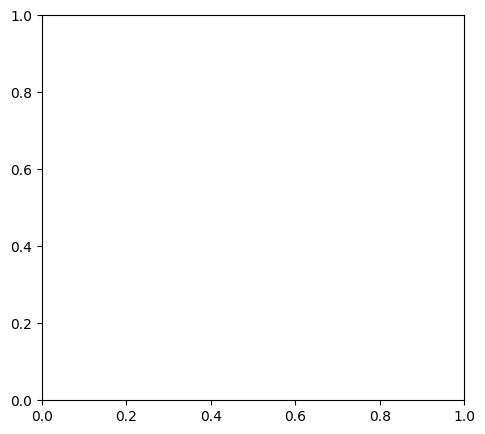

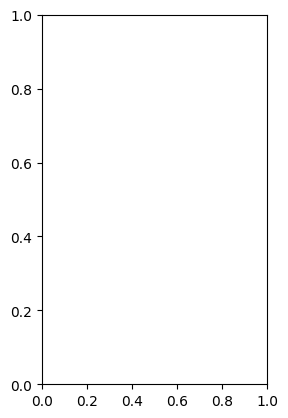

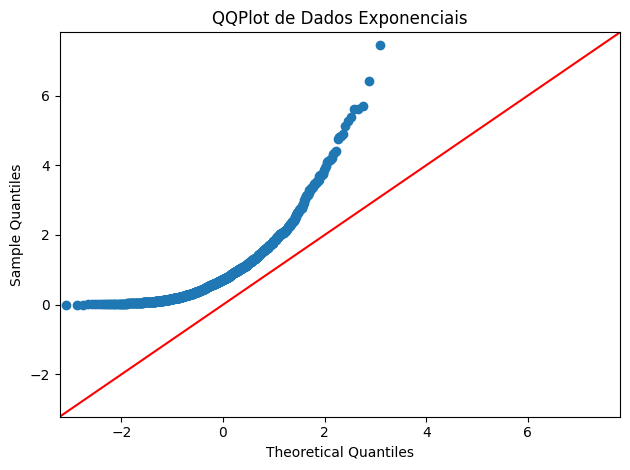

In [22]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gerar dados
np.random.seed(42)  # para reprodutibilidade
normal_data = np.random.normal(loc=0, scale=1, size=1000)
exponential_data = np.random.exponential(scale=1, size=1000)

# QQPlot para dados normais
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sm.qqplot(normal_data, line='45')
plt.title("QQPlot de Dados Normais")

# QQPlot para dados exponenciais
plt.subplot(1, 2, 2)
sm.qqplot(exponential_data, line='45')
plt.title("QQPlot de Dados Exponenciais")

plt.tight_layout()
plt.show()


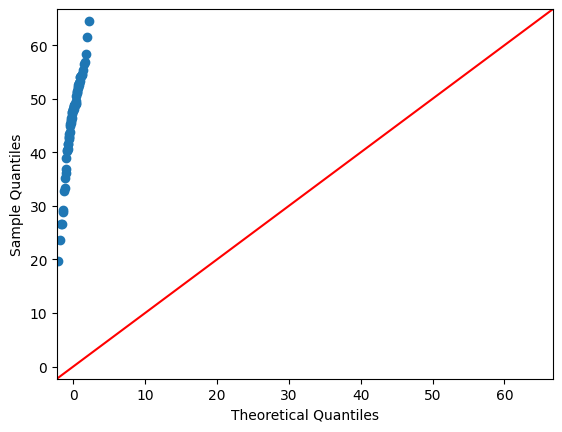

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados de exemplo
data = sm.datasets.heart.load_pandas().data

# Criando o QQPlot
sm.qqplot(data['age'], line='45')
plt.show()

<Figure size 600x500 with 0 Axes>

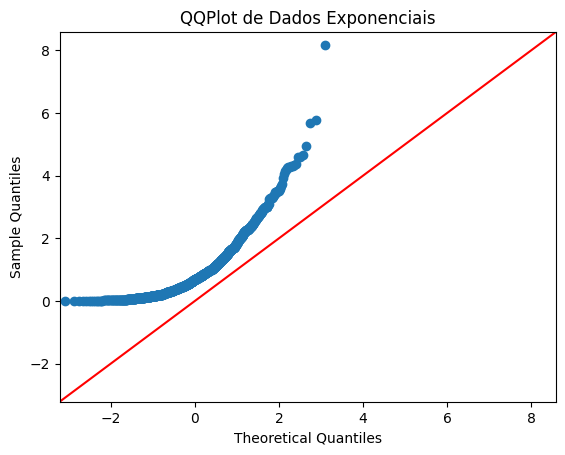

In [24]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gerar dados exponenciais
np.random.seed(42)  # para reprodutibilidade
exponential_data = np.random.exponential(scale=1, size=1000)

# QQPlot para dados exponenciais
plt.figure(figsize=(6, 5))
sm.qqplot(exponential_data, line='45')
plt.title("QQPlot de Dados Exponenciais")
plt.show()

<Figure size 600x500 with 0 Axes>

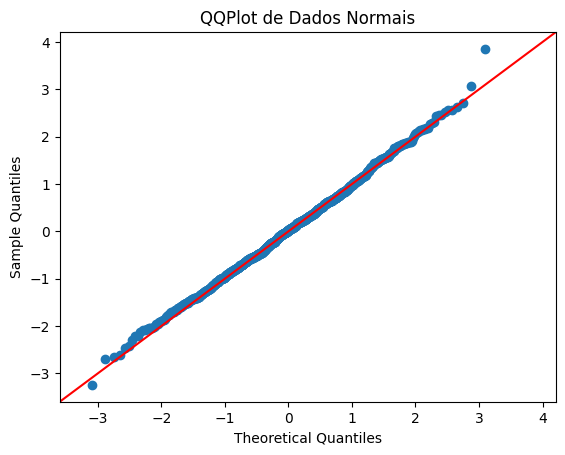

In [25]:
# Gerar dados normais
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# QQPlot para dados normais
plt.figure(figsize=(6, 5))
sm.qqplot(normal_data, line='45')
plt.title("QQPlot de Dados Normais")
plt.show()

In [26]:
from scipy.stats import kstest
valor_Ks, p_valor = kstest(df.mensalidade, 'norm')
print(valor_Ks, p_valor)

1.0 0.0


In [27]:
from statsmodels.stats.diagnostic import lilliefors
lilliefors(df.mensalidade)

(0.2516123813493612, 0.0009999999999998899)

In [28]:
from scipy.stats import shapiro
W, pvalue = shapiro(df.mensalidade)

print(f"Statistic (W): {W:.5f}")
print(f"P-value (notação): {pvalue:.2e}")
print(f"P-value (float): {pvalue:.20f}")

Statistic (W): 0.42162
P-value (notação): 2.40e-32
P-value (float): 0.00000000000000000000


In [29]:
import scipy.stats as stats
S, pvalor = stats.normaltest(df.mensalidade)

print(f"Estatística de qui-quadrado: {S:.5f}")
print(f"P-value (notação): {pvalor:.2e}")
print(f"P-value (float): {pvalor:.20f}")

Estatística de qui-quadrado: 514.98083
P-value (notação): 1.49e-112
P-value (float): 0.00000000000000000000


In [30]:
import scipy.stats as stats
stats.normaltest(df.mensalidade)

NormaltestResult(statistic=514.980825526912, pvalue=1.4905089694701414e-112)

In [35]:
from sklearn import preprocessing as preprocessing

bc = preprocessing.PowerTransformer(method='box-cox')
bc = bc.fit(df.loc[:, ['mensalidade']])
df['mensalidade_norm'] = xt = bc.transform(df.loc[:, ['mensalidade']])

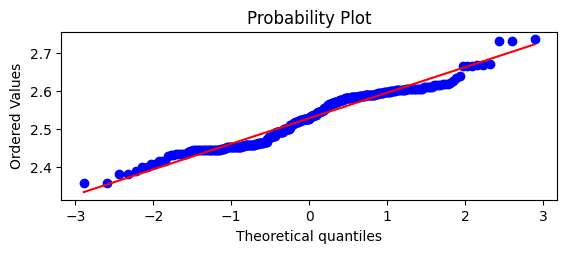

In [38]:
import matplotlib.pyplot as plt
import scipy.stats as stats
fig = plt.figure()
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(df['mensalidade'])
prob = stats.probplot( xt,
dist=stats.norm,
plot=ax2)

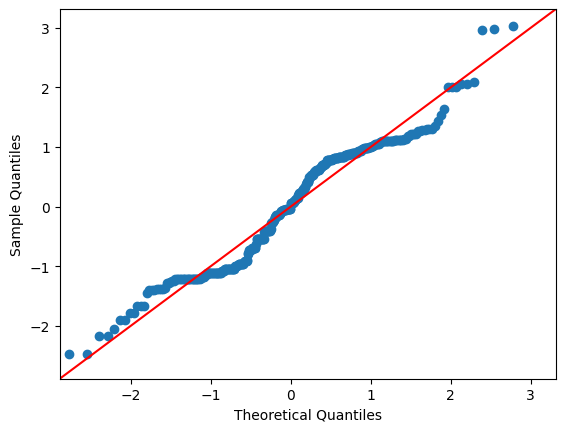

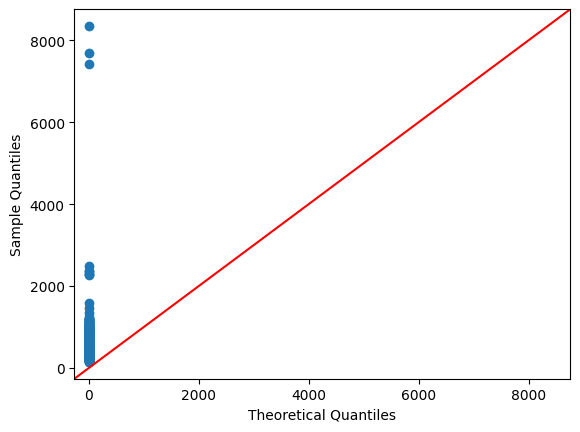

In [39]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Criando o QQPlot
sm.qqplot(df['mensalidade_norm'], line='45')
sm.qqplot(df['mensalidade'], line='45')
plt.show()

In [41]:
from sklearn import preprocessing as preprocessing
yt = preprocessing.PowerTransformer(method='yeo-johnson')
yt = yt.fit(df.loc[:, ['mensalidade']])
xt = yt.transform(df.loc[:, ['mensalidade']])

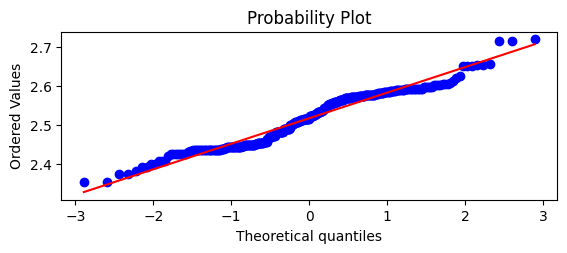

In [43]:
import matplotlib.pyplot as plt
import scipy.stats as stats
fig = plt.figure()
ax2 = fig.add_subplot(212)
xt, _ = stats.yeojohnson(df['mensalidade'])
prob = stats.probplot( xt,
                       dist=stats.norm,
                       plot=ax2)

In [45]:
from sklearn import preprocessing as preprocessing
qt = preprocessing.QuantileTransformer(output_distribution='normal',
                                       random_state=0)
qt = qt.fit(df.loc[:, ['mensalidade']])
xt = qt.transform(df.loc[:, ['mensalidade']])

D:\devSourceCode\uniesp_dmie232\venv\lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (360). n_quantiles is set to n_samples.
  warnings.warn(


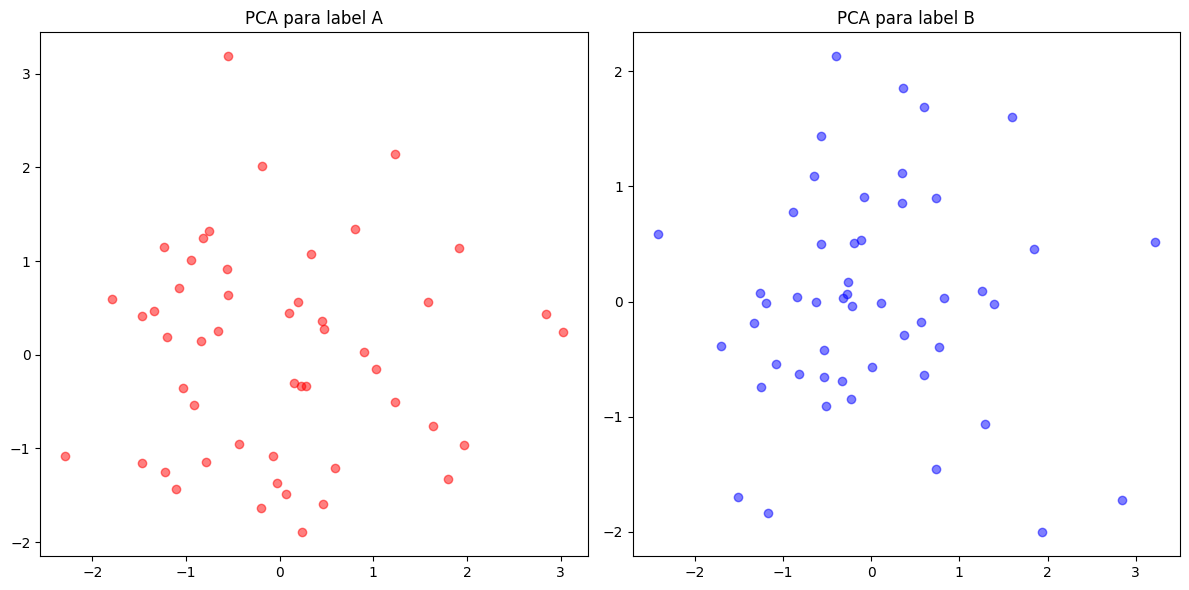

In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Dados de exemplo
np.random.seed(42)
df = pd.DataFrame({
    'feature_1': np.random.randn(100),
    'feature_2': np.random.randn(100),
    'feature_3': np.random.randn(100),
    'label': ['A'] * 50 + ['B'] * 50
})

features = ['feature_1', 'feature_2', 'feature_3']
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[features])

def apply_pca(data):
    pca = PCA(n_components=2)
    return pca.fit_transform(data)

# Dividir dados por label e aplicar PCA
data_A = scaled_df[df['label'] == 'A']
data_B = scaled_df[df['label'] == 'B']

pca_A = apply_pca(data_A)
pca_B = apply_pca(data_B)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_A[:, 0], pca_A[:, 1], color='red', alpha=0.5)
plt.title('PCA para label A')

plt.subplot(1, 2, 2)
plt.scatter(pca_B[:, 0], pca_B[:, 1], color='blue', alpha=0.5)
plt.title('PCA para label B')

plt.tight_layout()
plt.show()
